In [26]:
import pandas as pd

In [27]:
data = pd.read_csv("../../../GitHub/python-ml-course/datasets/ads/Advertising.csv")

In [28]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
len(data)

200

**Queremos saber si están relacionadas las variables de gasto publicitario en televisión (`TV`) con el número de ventas (`Sales`).**

In [30]:
import numpy as np

Ahora aplicamos la fórmula del coeficiente de correlación de pearson.

Lo haremos parte por parte, generando columnas de valores con los que luego operar. 

Primero haremos el numerador y luego las dos partes del divisor, para finalizar calculando el coeficiente.

In [35]:
# Debemos usar esta función para que no se realicen los cambios en el dataframe original
data_ads = data.copy(deep=True) 

In [36]:
data_ads["corr_n"] = (data_ads["TV"]-np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))
data_ads["corr1"] = (data_ads["TV"] -  np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"] -  np.mean(data_ads["Sales"]))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,corr_n,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [37]:
pearson = sum(data_ads["corr_n"]) / np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))
pearson

0.782224424861606

**Según el coeficiente de Pearson, las variables presentan una correlación positiva entre ellas.**

Ahora crearemos la receta de cocina para automatizar la obtención del coeficiente de correlación de pearson.

In [38]:
def correlation_coef(df, var1, var2):
    corrn = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    corr1 = (df[var1] - np.mean(df[var1]))**2
    corr2 = (df[var2] - np.mean(df[var2]))**2
    pearson = sum(corrn) / np.sqrt(sum(corr1)*sum(corr2))
    return pearson

Y comprobamos que está bien hecho.

In [39]:
correlation_coef(data, "TV", "Sales")

0.782224424861606

In [40]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Ahora podemos definir un bucle que nos devuelva los coeficientes de correlación entre todas las variables del `dataframe`.

In [41]:
cols = data.columns.values
for x in cols:
    for y in cols:
        print(x + ", " + y + ": " + str(correlation_coef(data, x, y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0


Vemos que la diagonal es 1 y que hay simetría.

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

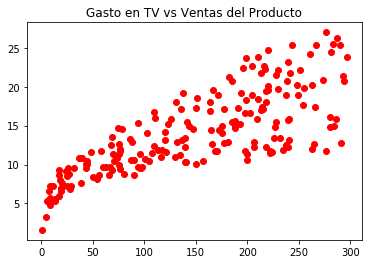

In [43]:
plt.plot(data["TV"], data["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

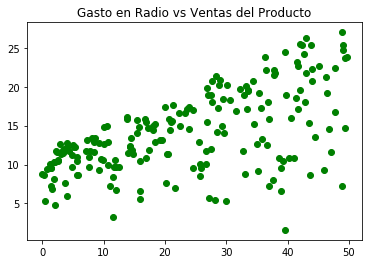

In [44]:
plt.plot(data["Radio"], data["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

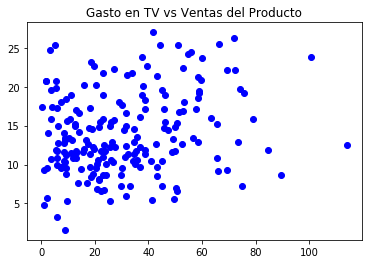

In [45]:
plt.plot(data["Newspaper"], data["Sales"], "bo")
plt.title("Gasto en TV vs Ventas del Producto")

Ahora bien, `Pandas` ya tiene implementada una función para obtener la matriz de correlación del dataset. Es la función `corr()`.

In [46]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Y se puede plotear con la librería de `matplotlib.plot` y la función `matshow` (matrix show) para obtener una visualización rápida de las correlaciones que se producen entre las variables del `datafrmae`.

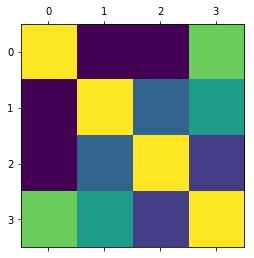

In [48]:
plt.matshow(data.corr())